In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



# Inspect the data
The data has been saved as a dataframe named heart in script.py. It contains the following variables:

`age`: age in years

`sex`: sex assigned at birth; 'male' or 'female'

`trestbps`: resting blood pressure in mm Hg

`chol`: serum cholesterol in mg/dl

`cp`: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')

`exang`: whether the patient experiences exercise-induced angina (1: yes; 0: no)

`fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)

`thalach`: maximum heart rate achieved in exercise test

`heart_disease`: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


# Predictors of heart disease

Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

ch of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

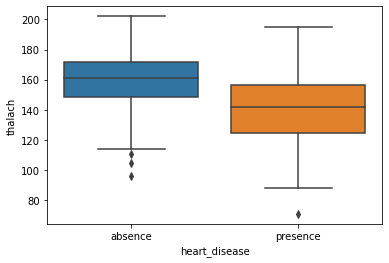

In [3]:
sns.boxplot(y = df.thalach, x = df.heart_disease)
plt.show()

** Response **:It looks like there is a relation between the maximum heart rate and a heart disease.

In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of thalach among patients who were not diagnosed with heart disease as `thalach_no_hd`.

Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [4]:
thalach_no_hd = df.thalach[df.heart_disease == 'absence']
thalach_hd = df.thalach[df.heart_disease == 'presence']
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print(mean_diff)
median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print(median_diff)


19.11905597473242
19.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

Null: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.
’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

Null: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.

Alternative: The average `thalach` for a person with heart disease is NOT equal to the average `thalach` for a person without heart disease.

** Response **

We can test an association between a quantitative variable and a binary categorical variable by using a two-sample t-test. The null hypothesis for a two-sample t-test is that the difference in group means is equal to zero. A two-sample t-test can be implemented in Python using the `ttest_ind()` function from
 Response **

We can test an association between a quantitative variable and a binary categorical variable by using a two-sample t-test. The null hypothesis for a two-sample t-test is that the difference in group means is equal to zero. A two-sample t-test can be implemented in Python using the `ttest_ind()` function from
`scipy.stats` 


In [5]:
from scipy.stats import ttest_ind

In [6]:
tstat, pval = ttest_ind(thalach_no_hd, thalach_hd)
pval

3.456964908430172e-14

The p value obtained is sigficative lower than 0.05. * Therefore the null hypothesis is rejected. *

Using the same process, investigate at least one other quantitative variable. Options include `age`, `trestbps` (resting blood pressure), and `chol` (cholesterol). Are any of these variables also significantly associated with heart disease?

## Relation between cholesterol and heart disease

First we are going to plot the values of cholesterol (quantitative variable) vs heart disease (binary categorical variable)

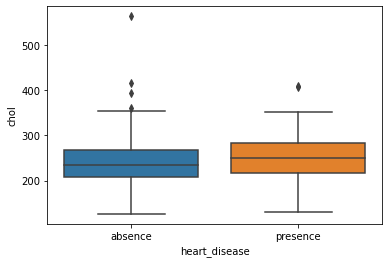

In [7]:
plt.clf()
sns.boxplot(y=df.chol, x = df.heart_disease)
plt.show()

### Two sample test


In [8]:
chol_no_hd = df.chol[df.heart_disease == 'absence']
chol_hd = df.chol[df.heart_disease == 'presence']
mean_diff = np.mean(chol_no_hd) - np.mean(chol_hd)
print(mean_diff)
median_diff = np.median(chol_no_hd) - np.median(chol_hd)
print(median_diff)

-8.834576241445887
-14.5


Both median and mean of cholesterol levels are lower in the case of individuals without heart disease. But are these difference significant.

Null: The average `chol` for a person with heart disease is equal to the average `chol` for a person without heart disease.

Alternative: The average `chol` for a person with heart disease is NOT equal to the average `chol` for a person without heart disease.

In [9]:
tstat, pval = ttest_ind(chol_no_hd, chol_hd)
pval

0.13914167020436527

At a significance p-value of 0.05 the null hypothesis can not be rejected.

# Chest Pain and Max Heart Rate

Chest Pain and Max Heart Rate

Next, let’s investigate the relationship between `thalach` (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!



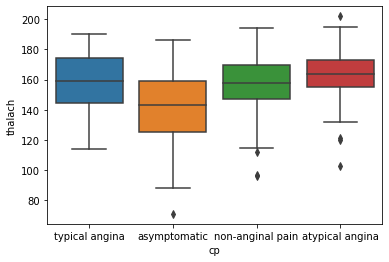

In [10]:
plt.clf()
sns.boxplot(x= df.cp, y = df.thalach)
plt.show()

For asymptomatical patiens the max heart rate is significantly lower.

Next, we are going to store the values of each type of chest pain. 

In [11]:
thalach_typical = df.thalach[df.cp == 'typical angina']
thalach_asymptom = df.thalach[df.cp == 'asymptomatic']
thalach_nonangin = df.thalach[df.cp == 'non-anginal pain']
thalach_atypical = df.thalach[df.cp == 'typical angina']

Run a single hypothesis test to address the following null and alternative hypotheses:

** Null: ** People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average `thalach`.

** Alternative: ** People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average `thalach`.

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

An Analysis Of Variance (ANOVA) is used to test an association between a non-binary categorical variable and a quantitative variable while limiting the probability of a type I error. The null hypothesis for ANOVA is that the group means are all equal. The alternative hypothesis is that at least one pair of group means are different.

In [13]:
from scipy.stats import f_oneway

In [15]:
fstat, pvalue = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
pvalue # the pvalue obtained is significant.

7.756357411693586e-07

Tukey’s range test should be used after ANOVA (if the p-value is significant) to simultaneously compare group means for all possible pairs of groups while maintaining some pre-chosen probability of a type I error.

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [27]:
tukey_results = pairwise_tukeyhsd(df.thalach, df.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


The mean for the asymptomatic group is significatly different compared to the other groups.

Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of `cp` and `heart_disease` and save it as `Xtab`, then print it out.

To test for an association between two categorical variables, we can use a Chi-Square test. The null hypothesis for a Chi-Square test is that there is no association between the variables and the alternative hypothesis is that there is an association between the variables.

In [28]:
from scipy.stats import chi2_contingency

In [31]:
# create contingency table
Xtab = pd.crosstab(df.cp, df.heart_disease)
Xtab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


Run a hypothesis test for the following null and alternative hypotheses:

Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.

Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [34]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
pval

1.2517106007837527e-17

** Conclusion: **The null hypothesis is rejected.